Import the Required Libraries

In [1]:
import pandas as pd
from plotnine import *
import dask.dataframe
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

Read the data as pandas pandas dataframe

In [2]:
data=pd.read_csv('USStates.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Analyse the structure of data

In [3]:
print(data.head())
print(data.shape)
print(data.columns)

        State  HouseholdIncome Region  Population  EighthGradeMath  \
0     Alabama           43.253      S       4.849            269.2   
1      Alaska           70.760      W       0.737            281.6   
2     Arizona           49.774      W       6.731            279.7   
3    Arkansas           40.768      S       2.966            277.9   
4  California           61.094      W      38.803            275.9   

   HighSchool  College    IQ     GSP  Vegetables   ...     PhysicalActivity  \
0        84.9     24.9  95.7  32.615        74.2   ...                 45.4   
1        92.8     24.7  99.0  61.156        80.8   ...                 55.3   
2        85.6     25.5  97.4  35.195        76.2   ...                 51.9   
3        87.1     22.4  97.5  31.837        72.0   ...                 41.2   
4        84.1     31.4  95.5  46.029        82.7   ...                 56.3   

   Obese  NonWhite  HeavyDrinkers  Electoral  ObamaVote  ObamaRomney  \
0   32.4      30.7            4.

In [52]:
#data=dask.dataframe.read_csv('USStates.csv')
#Wprint(type(data))

<class 'dask.dataframe.core.DataFrame'>


1. Use the ggplot2 library to draw a suitable graph of the Smokers variable, the percentage of
residents who smoke. Describe the shape and center of this distribution using a histogram and
a density plot. <br>
Density Plot

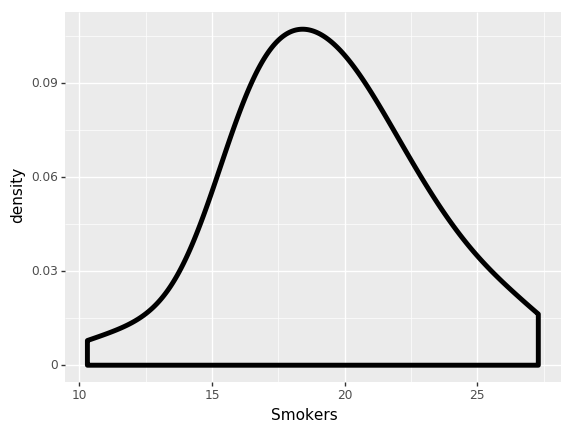

<ggplot: (-9223371893205471193)>

In [4]:
(ggplot(data)         # defining what data to use
 + aes(x='Smokers')    # defining what variable to use
 + geom_density(size=2)# defining the type of plot to use
)

Histogram plot of Smokers data.

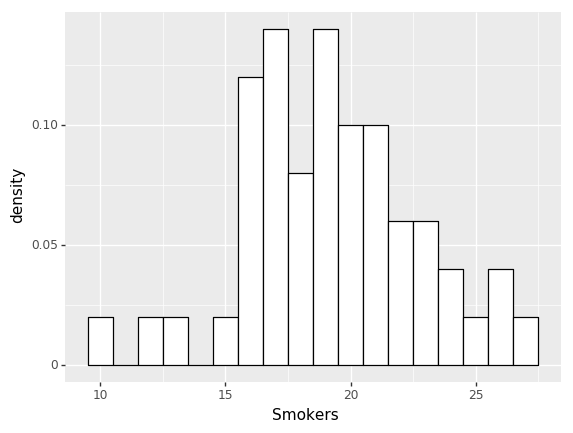

<ggplot: (-9223371893205260796)>

In [5]:
(ggplot(data)         # defining what data to use
 + aes(x='Smokers')    # defining what variable to use
 + geom_histogram(aes(y="..density.."),
                   binwidth=1, 
                   colour = "black", 
                   fill = "white"))

From the plot ,it is seen that smokers fetures in normally distributed with a very little left skew which can be neglected and can be analysed as normal
distribution.<br>

 What is the mean proportion of smokers, averaged evenly across the 50 states?

In [59]:
data.nunique()

State               50
HouseholdIncome     50
Region               4
Population          50
EighthGradeMath     45
HighSchool          44
College             45
IQ                  43
GSP                 50
Vegetables          41
Fruit               43
Smokers             45
PhysicalActivity    43
Obese               42
NonWhite            48
HeavyDrinkers       31
Electoral           19
ObamaVote           46
ObamaRomney          2
TwoParents          45
StudentSpending     50
Insured             48
dtype: int64

Since shape is 50 rows and number of unique values in state in also 50.So there is no repeatation in states.

In [60]:
data['Smokers'].mean()

19.316000000000003

The mean vlaues of smokers of  all 50 states is 19.316.

Write a function in python that will take 10,000 random samples of 5 states and return the
mean proportion of smokers for each sample. This is a simulation of the sampling distribution of
the sample mean proportion of smokers. Calculate the mean and standard deviation of this
sampling distribution and use ggplot2 to display the distribution with a density plot. Describe the
center and shape of the distribution in this plot.

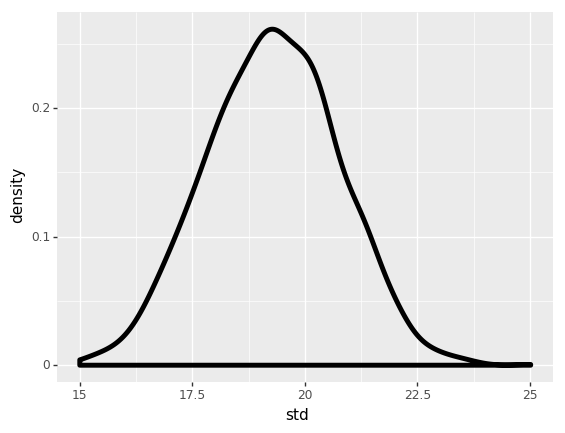

<ggplot: (83614048467)>

In [77]:
sample_dist=pd.DataFrame()
def sample_mean(n,data,size):
    l=[]
    for i in range (n):
        l.append(data.sample(size).mean())
    return l
sample_dist['mean']=sample_mean(2000,data['Smokers'],5)
(ggplot(sample_dist) + aes(x='mean')+ geom_density(size=2))


C:\Users\Sam Jones\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


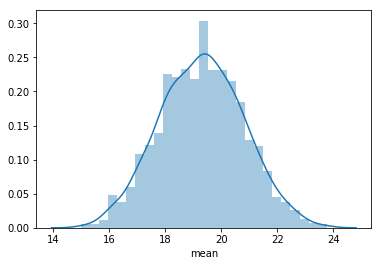

In [108]:
sns.distplot(sample_dist['mean'],hist=True)
plt.show()

The density plots of mean sample distribution of smokers forms a normal distrinution,which is according to Central Limit Theorem.<br>

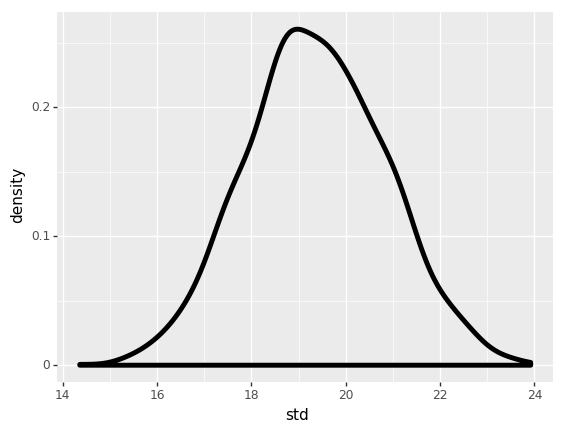

<ggplot: (-9223371953240463051)>

In [122]:
def sample_std(n,data,size):
    l=[]
    for i in range (n):
        sample_data=data.sample(size)
        std=pd.std(sample_data)
        l.append(std)
    return l
sample_dist['std']=sample_mean(2000,data['Smokers'],5)
(ggplot(sample_dist) + aes(x='std')+ geom_density(size=2))

C:\Users\Sam Jones\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


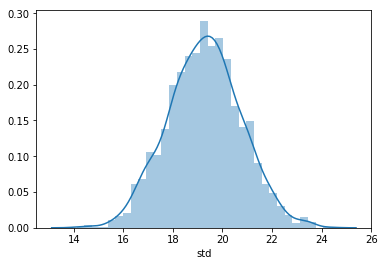

In [113]:
sns.distplot(sample_dist['std'],hist=True)
plt.show()

The density plots of standard deviation sample distribution of smokers forms a normal distrinution,which is according to Central Limit Theorem.<br>

In [117]:
print("Mean of Mean Sample Distribution:",np.mean(sample_dist['mean']))

Mean of Mean Sample Distribution: 19.304069999999992


 What is the standard deviation of the above distribution.

In [118]:
print("Standard Deviation  of Mean Sample Distribution:",np.std(sample_dist['mean']))

Standard Deviation  of Mean Sample Distribution: 1.4940965280396024


One sample of five states is Arkansas, Florida, Pennsylvania, California, and Vermont. Find
the mean proportion of smokers across these five states and use information from earlier parts
to construct a 95% confidence interval for the mean proportion of smokers. Does this
confidence interval contain the true mean

In [6]:
states=['Arkansas','Florida','Pennsylvania','California','Vermont']
def conf_interval_check(states,data,zval,act_mean):
    state_mean=[]
    for i in range (len(states)):
        temp_data=data['Smokers'][data['State']==states[i]].values[0]
        state_mean.append(temp_data)
    mean=np.mean(state_mean)
    std=np.std(state_mean)
    upper_interval=mean+(zval*(std/sqrt(len(states))))
    lower_interval=mean-(zval*(std/sqrt(len(states))))
    print("Confidence Interval is:",lower_interval,"to",upper_interval)
    if act_mean>=lower_interval and  act_mean<=upper_interval:
        print("The actual mean lies between the confidence intervals.")
    else:
        print("The actual mean is not between the  boundaries of the confidence intervals.")
conf_interval_check(states,data,1.96,data['Smokers'].mean())

Confidence Interval is: 14.5721440989 to 22.5478559011
The actual mean lies between the confidence intervals.


Since the mean is between confidence intervals,we can conclude that with 95% of confidence that sample represents the population .